### HIV infected patients
The AIDS Clinical Trials Group Study 175 Dataset, initially published in 1996, is a comprehensive collection of healthcare statistics and categorical information about patients diagnosed with HIV-1 Infections.

Study Design: Randomized double blind clinical trial, follow-up over the course of 2 years.
 2139 patients, 23 features, all patients had zvd prior to the trial.

The objective of the study was to examine the performance of combination therapy vs monotherapy in preventing the progressing of AIDS. Treatment groups: zidovudine (AZT), AZT + didanosine (ddI), AZT + zalcitabine (ddC), ddI.

Scientific questions:
- Which variables influence the progression of AIDS?
- Do combination treatments have higher efficiency in preventing the advancement of AIDS?
- Which treatment is the most efficient in preventing the advancement of AIDS?


Dataset repository url: https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
  
# metadata 
print(aids_clinical_trials_group_study_175.metadata) 
  
# variable information 
print(aids_clinical_trials_group_study_175.variables) 


{'uci_id': 890, 'name': 'AIDS Clinical Trials Group Study 175', 'repository_url': 'https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175', 'data_url': 'https://archive.ics.uci.edu/static/public/890/data.csv', 'abstract': 'The AIDS Clinical Trials Group Study 175 Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996. The prediction task is to predict whether or not each patient died within a certain window of time or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 2139, 'num_features': 23, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Sexual Orientation', 'Race', 'Gender'], 'target_col': ['cid'], 'index_col': ['pidnum'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Fri Nov 

In [328]:
# Data Exploration 
print(X.head())
X.size
y.size

   time  trt  age     wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0   948    2   48  89.8128     0     0      0     100       0    0  ...   
1  1002    3   61  49.4424     0     0      0      90       0    1  ...   
2   961    3   45  88.4520     0     1      1      90       0    1  ...   
3  1166    3   47  85.2768     0     1      0     100       0    1  ...   
4  1090    0   43  66.6792     0     1      0     100       0    1  ...   

   gender  str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  
0       0     0      1        0      1       0   422    477   566    324  
1       0     1      3        0      1       0   162    218   392    564  
2       1     1      3        0      1       1   326    274  2063   1893  
3       1     1      3        0      1       0   287    394  1590    966  
4       1     1      3        0      0       0   504    353   870    782  

[5 rows x 23 columns]


2139

In [329]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cid     2139 non-null   int64
dtypes: int64(1)
memory usage: 16.8 KB


Preprocessing

In [18]:
# Delete the columns
X=X.drop(['treat'],axis=1)
X=X.drop(['zprior'],axis=1)
X=X.drop(['preanti'],axis=1)
X=X.drop(['z30'],axis=1)


#### Data Distribution

In [16]:
# Data Distribution
def plot_target(data, col: str, title: str, test_df: pd.DataFrame = pd.DataFrame()) -> None:
    pastel_colors=sns.color_palette('pastel6')
    unique_classes = data[col].unique()
    color_dict = {cls: pastel_colors[i % len(pastel_colors)] for i, cls in enumerate(unique_classes)}

    if not test_df.empty:
        fig, axes = plt.subplots(1, 4, figsize=(20, 6), gridspec_kw={'width_ratios': [2, 1, 2, 1]})
        

        for i, data in enumerate([data, test_df]):
            textprops={'fontsize': 12, 'weight': 'bold', 'color': 'black'}
            ax = axes[i * 2]
            counts = data[col].value_counts()
            colors = [color_dict[cls] for cls in counts.index]

            ax.pie(data[col].value_counts().to_list(),
                colors=colors,
                labels=data[col].value_counts().index.to_list(),
                autopct='%1.f%%',
                explode=([.05] * len(counts)),
                pctdistance=0.5,
                wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
                textprops=textprops)

            sns.countplot(x=col, data=data, palette=color_dict, hue = col,order=counts.index, ax=axes[i * 2 + 1])

            for p, count in enumerate(count.values):
                axes[i * 2 + 1].text(p - 0.1, count + (np.sqrt(count)), count, color='black', fontsize=13)

            plt.setp(axes[i * 2 + 1].get_xticklabels(), fontweight='bold')
            plt.yticks([], ax=axes[i * 2 + 1])
            axes[i * 2 + 1].set_ylabel('')
            axes[i * 2 + 1].set_xlabel('')

            axes[i * 2].set_title(f'Distribution in {"Train" if i == 0 else "Test"} Set', fontsize=16, fontweight='bold')

        fig.suptitle(x=0.5, y=1.05, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.show()

    else:
        fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

        textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
        counts = data[col].value_counts()
        colors = [color_dict[cls] for cls in counts.index]
        
        ax[0].pie(counts.to_list(),
                  colors=colors,
                  labels=counts.index.to_list(),
                  autopct='%1.f%%', 
                  explode=([.05] * len(counts)),
                  pctdistance=0.5,
                  wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, 
                  textprops=textprops)

        sns.countplot(x=col, data=data, palette=color_dict,hue=col, order=counts.index, ax=ax[1])
        for p, count in enumerate(counts.values):
            ax[1].text(p - 0.1, count + (np.sqrt(count)), count, color='black', fontsize=13)
        
        plt.setp(ax[1].get_xticklabels(), fontweight="bold")
        plt.yticks([])
        plt.box(False)
        fig.suptitle(x=0.56, t=f' {title} Distribution ', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.show()

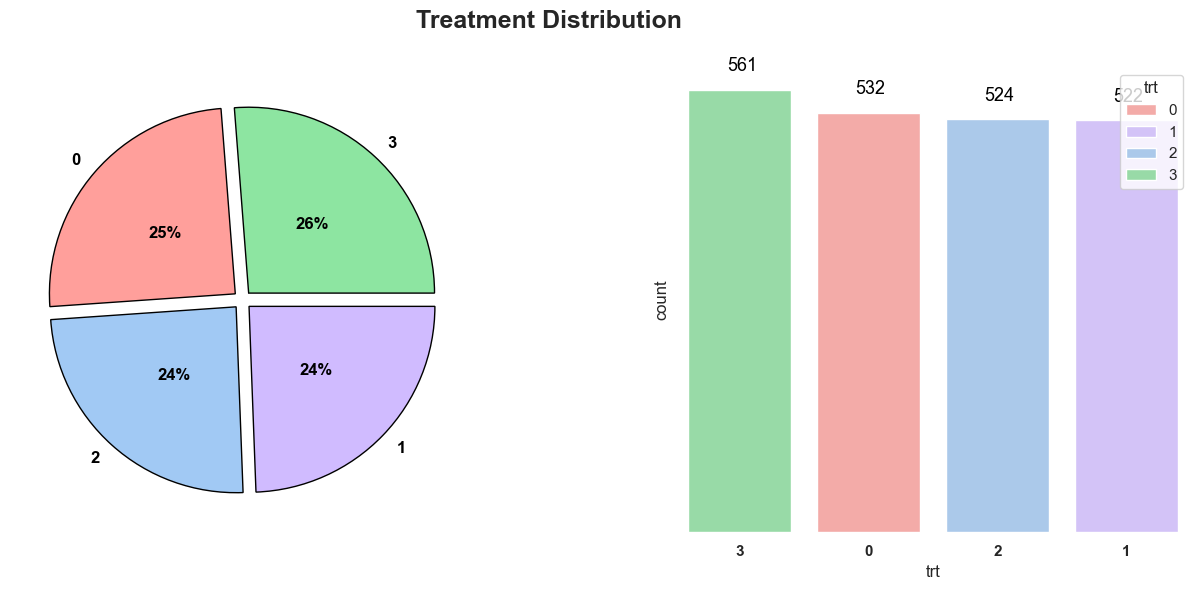

In [244]:
plot_target(X,col='trt', title= 'Treatment')

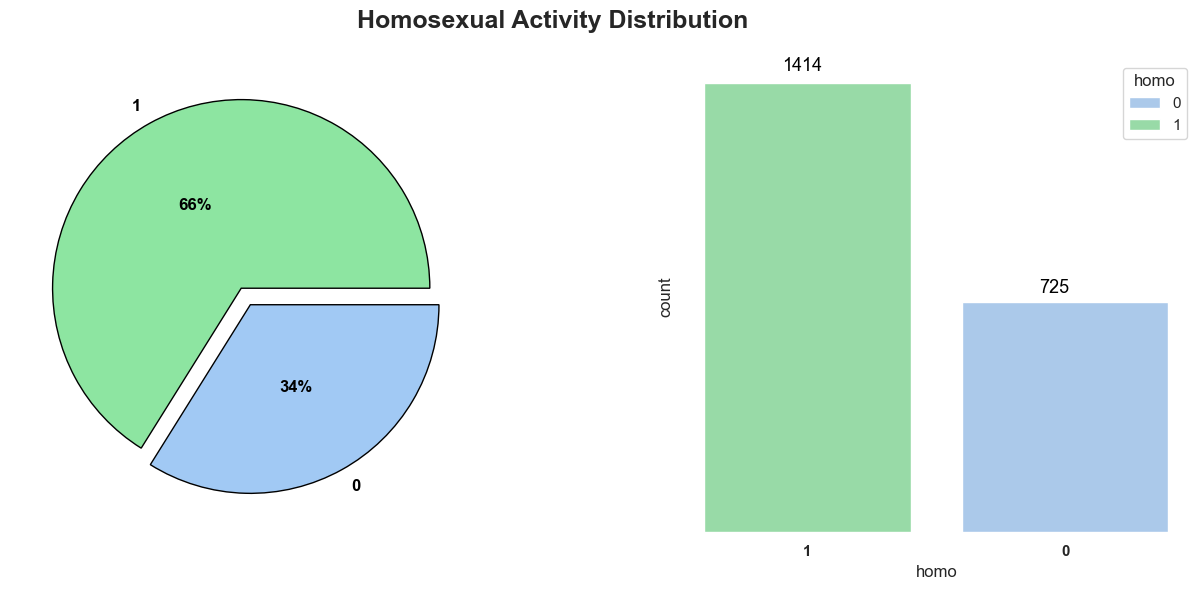

In [245]:
plot_target(data=X,col= 'homo',title='Homosexual Activity')

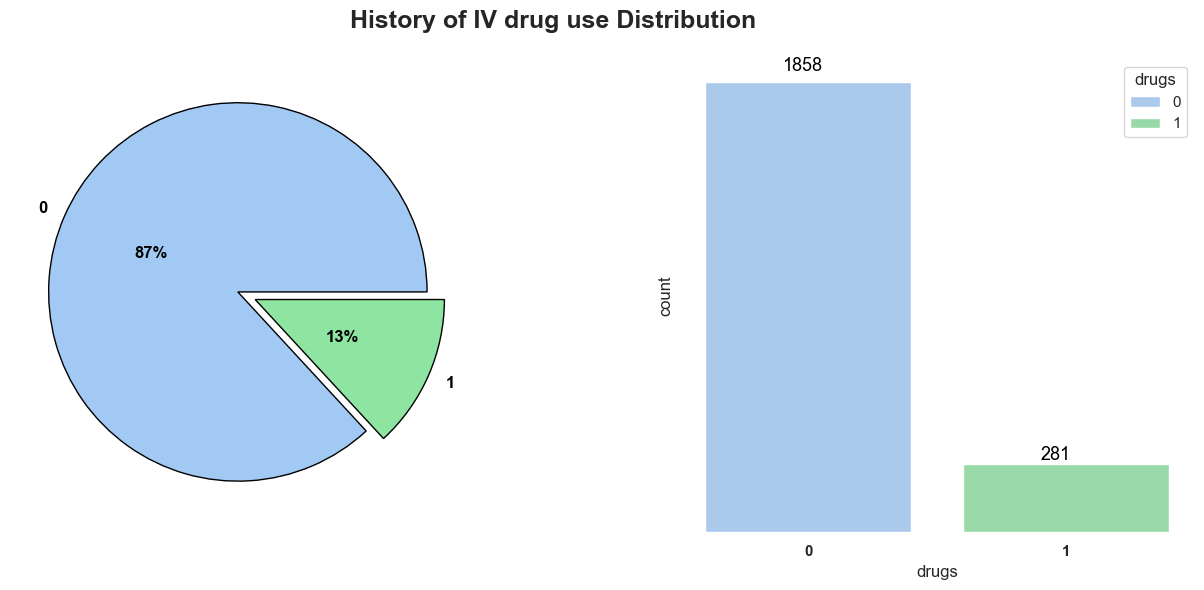

In [246]:
plot_target(data=X,col='drugs',title='History of IV drug use')

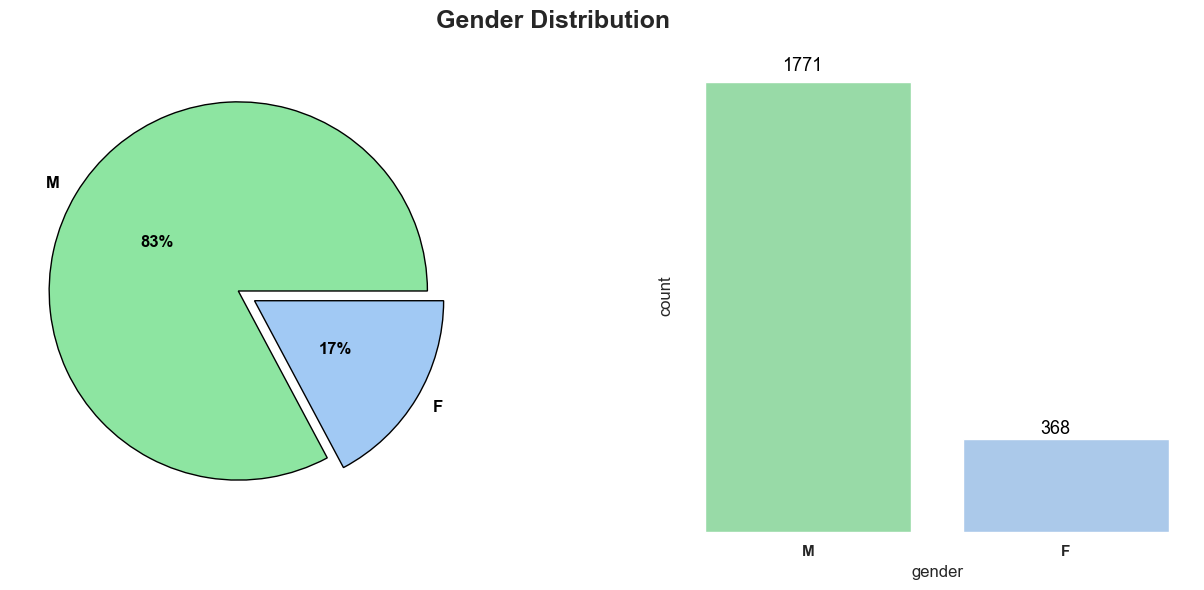

In [223]:
plot_target(data=X,col= 'gender',title='Gender')

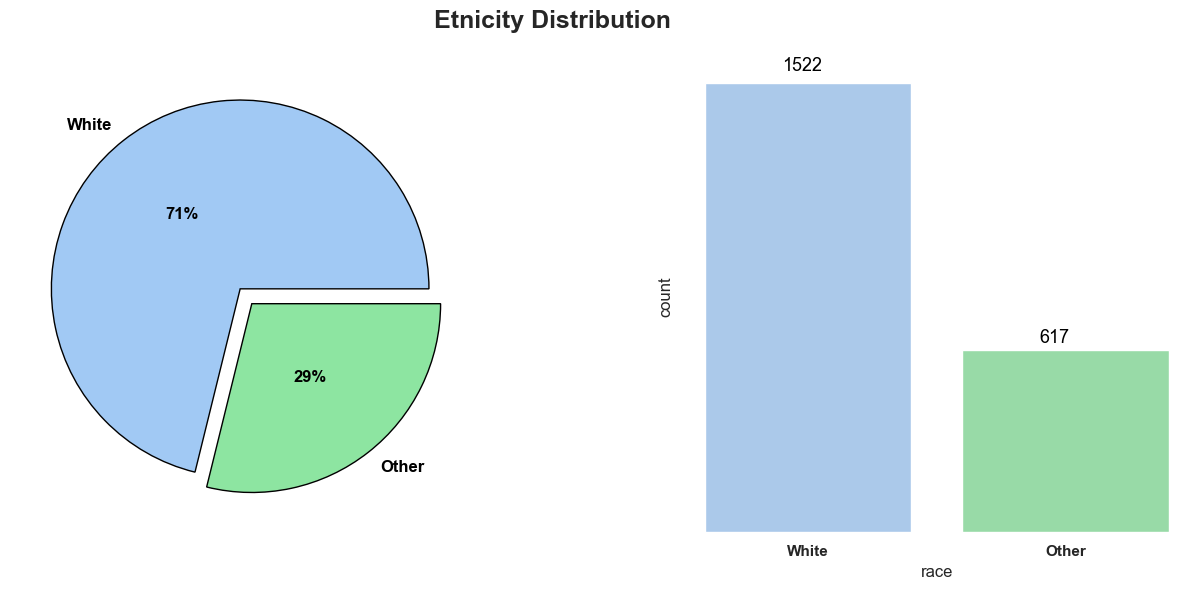

In [224]:
plot_target(data=X,col='race',title='Etnicity')

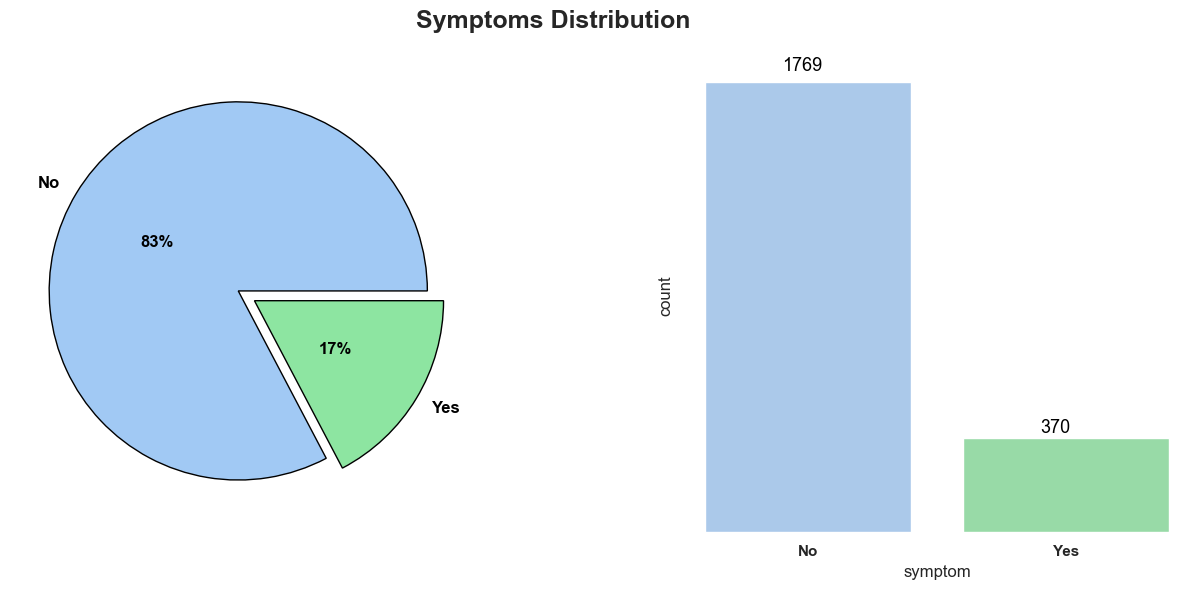

In [225]:
plot_target(data=X,col= 'symptom',title='Symptoms')

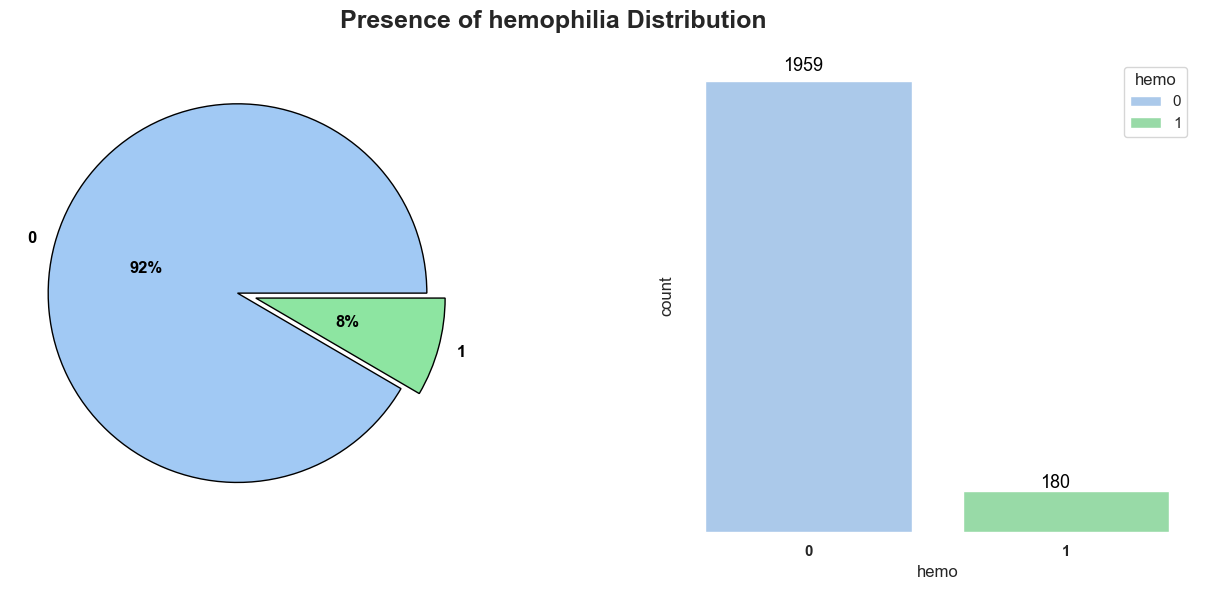

In [250]:
plot_target(data=X,col='hemo',title='Presence of hemophilia')

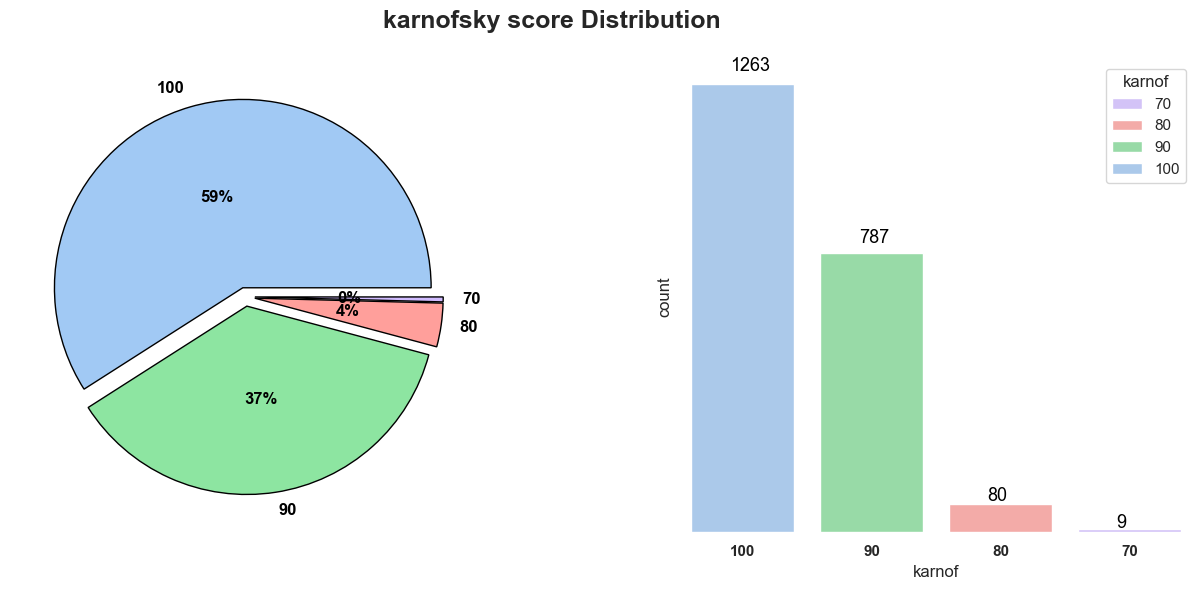

In [251]:
plot_target(data=X,col='karnof',title='karnofsky score')

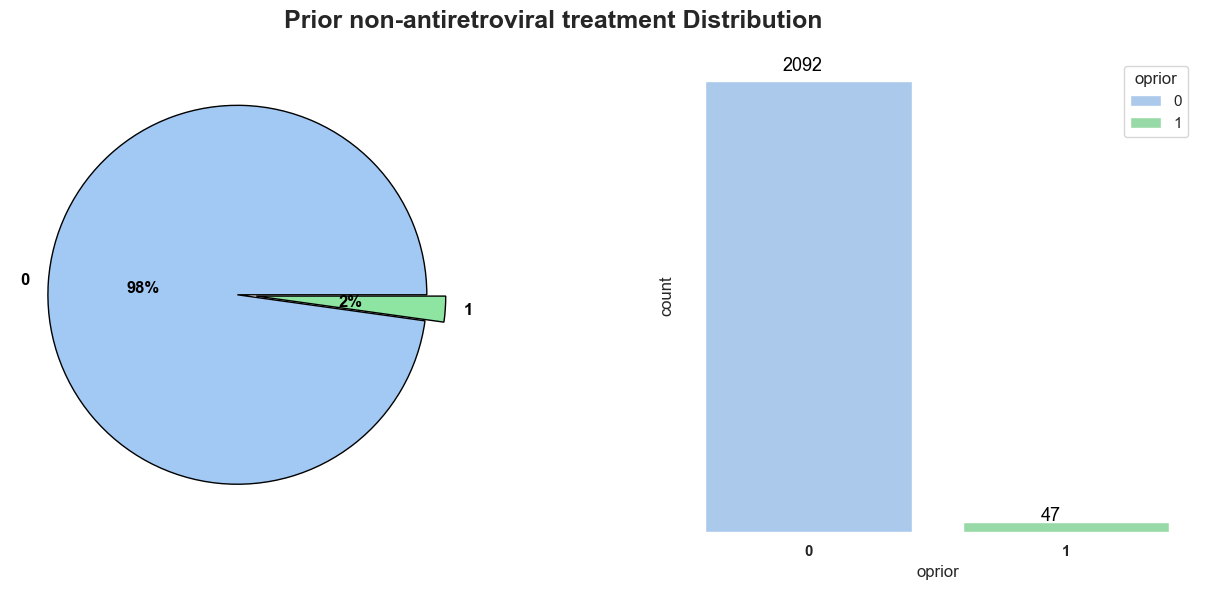

In [327]:
plot_target(data=X,col='oprior', title='Prior non-antiretroviral treatment')

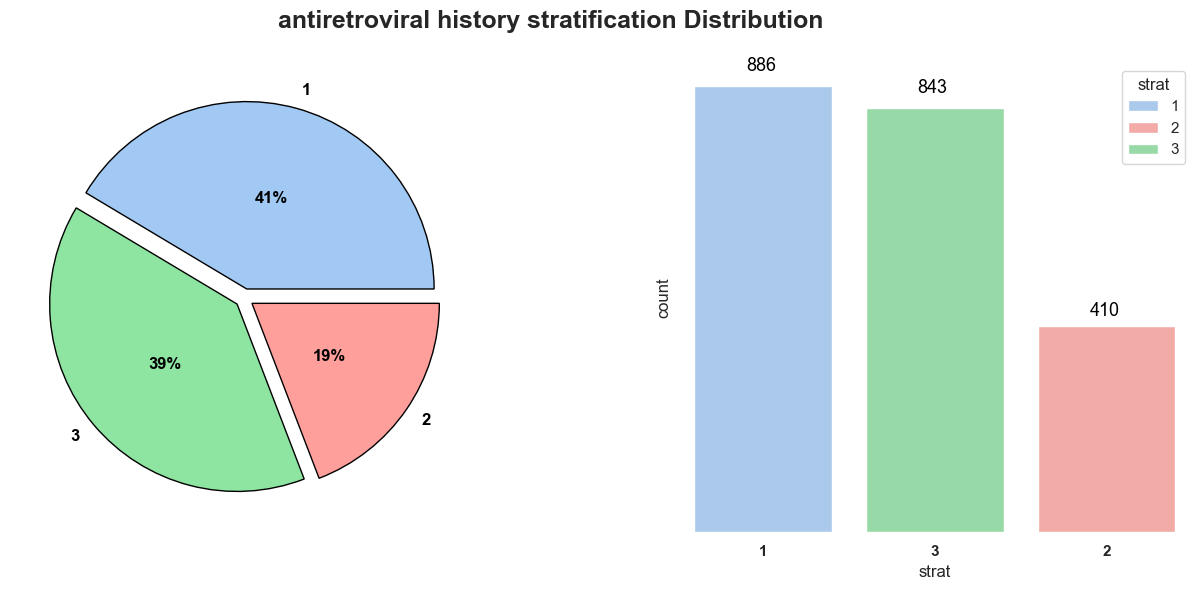

In [328]:
plot_target(data=X,col='strat', title='antiretroviral history stratification')

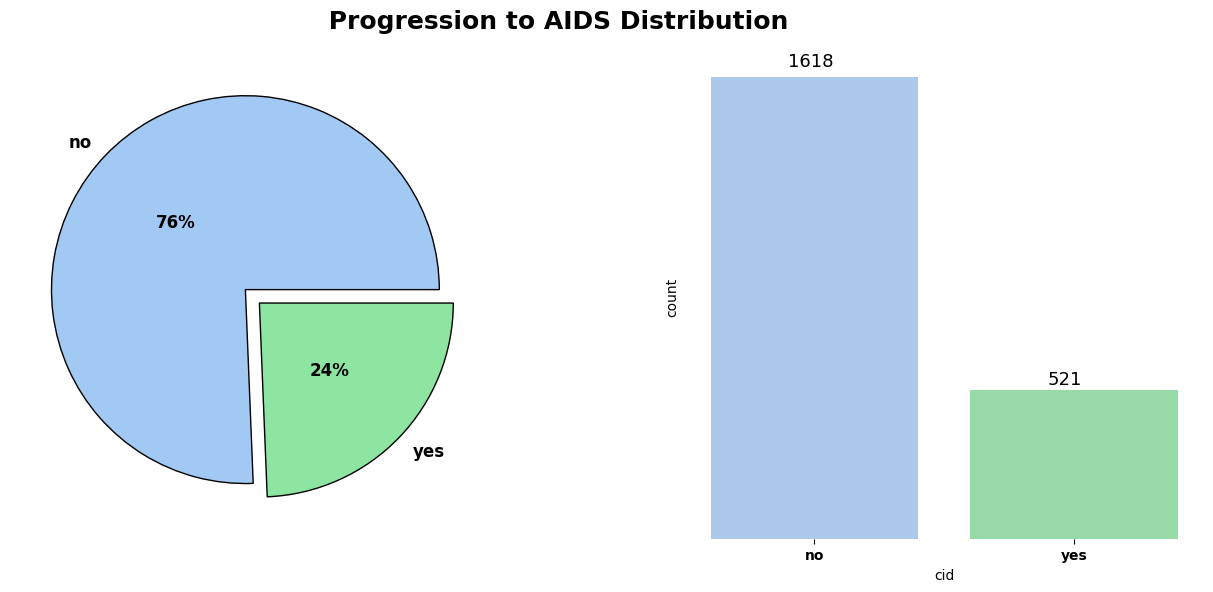

In [20]:
plot_target(data=y,col='cid',title='Progression to AIDS')

Text(0, 0.5, 'Frequency')

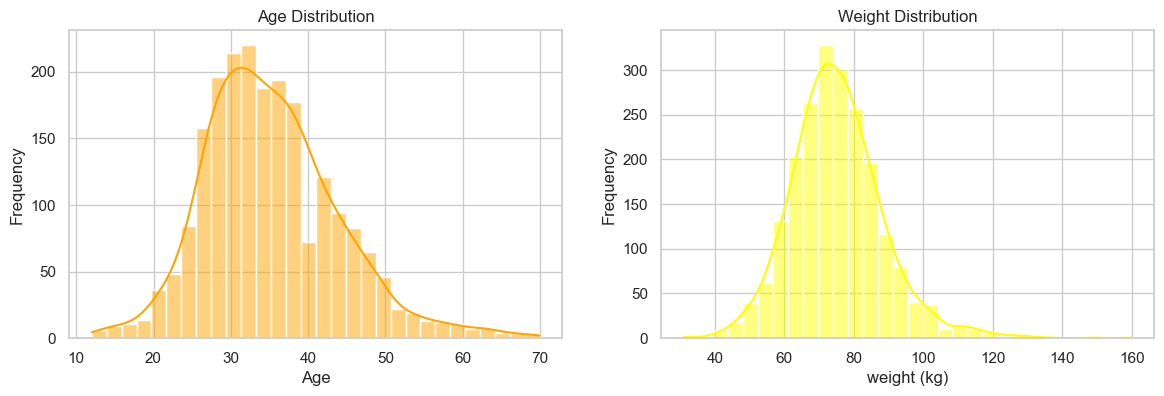

In [85]:
# Continous variables distribution: age and weight

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.histplot(X['age'], color = 'orange',kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(X['wtkg'], color='yellow',kde=True, bins=30)
plt.title('Weight Distribution')
plt.xlabel('weight (kg)')
plt.ylabel('Frequency')

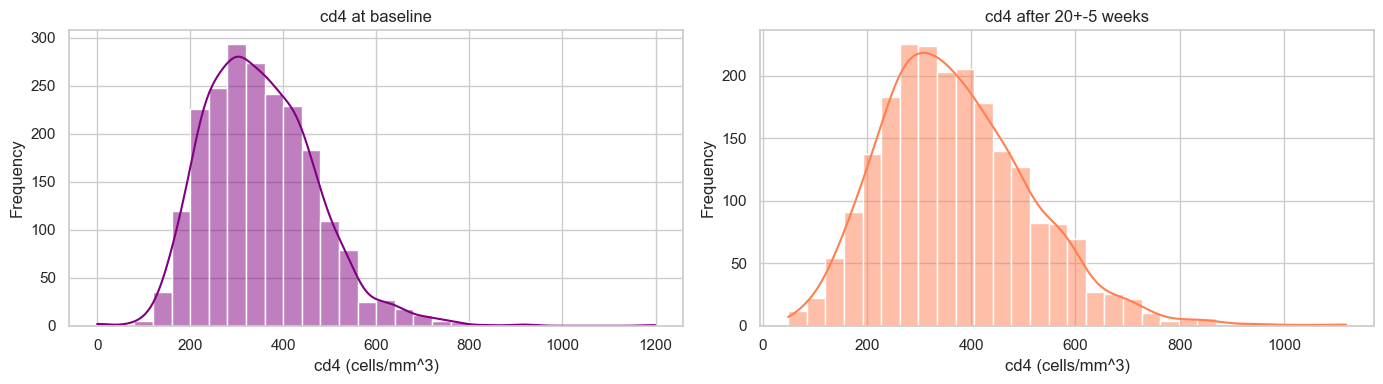

In [84]:
# Countinous variables distribution: cd40 and cd420
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(X['cd40'], color='purple',kde=True, bins=30)
plt.title('cd4 at baseline')
plt.xlabel('cd4 (cells/mm^3)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(X['cd420'],color='coral', kde=True, bins=30)
plt.title('cd4 after 20+-5 weeks')
plt.xlabel('cd4 (cells/mm^3)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

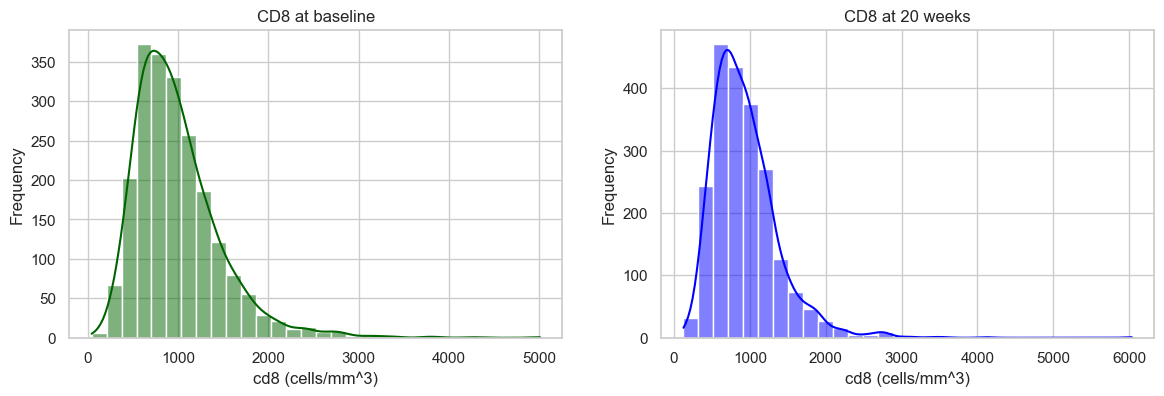

In [253]:
# Countinous variables distribution: cd80 and cd820
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.histplot(X['cd80'], color = 'darkgreen',kde=True, bins=30)
plt.title('CD8 at baseline')
plt.xlabel('cd8 (cells/mm^3)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(X['cd820'], color='blue',kde=True, bins=30)
plt.title('CD8 at 20 weeks')
plt.xlabel('cd8 (cells/mm^3)')
plt.ylabel('Frequency')

In [79]:
# Description of continuous variables
print('Age distribution:', X['age'].describe())
print('\nCD4 at baseline distribution:', X['cd40'].describe())
print('\nCD4 at 20+-5 weeks distribution:', X['cd420'].describe())

Age distribution: count    2139.000000
mean       35.248247
std         8.709026
min        12.000000
25%        29.000000
50%        34.000000
75%        40.000000
max        70.000000
Name: age, dtype: float64

CD4 at baseline distribution: count    2139.000000
mean      350.501169
std       118.573863
min         0.000000
25%       263.500000
50%       340.000000
75%       423.000000
max      1199.000000
Name: cd40, dtype: float64

CD4 at 20+-5 weeks distribution: count    2139.000000
mean      371.307153
std       144.634909
min        49.000000
25%       269.000000
50%       353.000000
75%       460.000000
max      1119.000000
Name: cd420, dtype: float64


In [51]:
print('Weight (kg) distribution:',X['wtkg'].describe())

Weight (kg) distribution: count    2139.000000
mean       75.125311
std        13.263164
min        31.000000
25%        66.679200
50%        74.390400
75%        82.555200
max       159.939360
Name: wtkg, dtype: float64


Text(0, 0.5, 'Frequency')

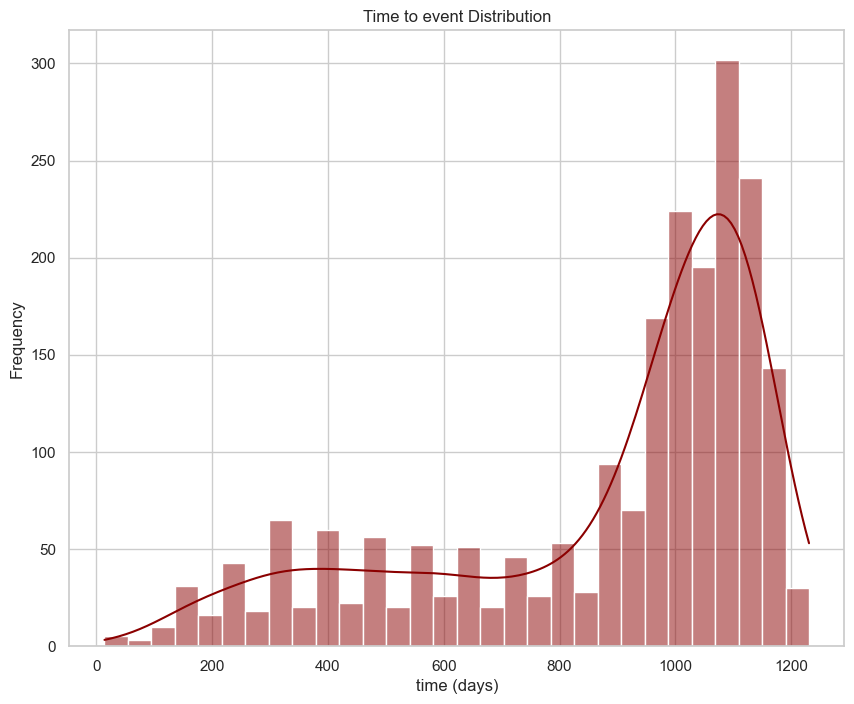

In [67]:
#Time distribution
plt.figure(figsize=(10,8))

sns.histplot(X['time'], color='darkred',kde=True, bins=30)
plt.title('Time to event Distribution')
plt.xlabel('time (days)')
plt.ylabel('Frequency')

In [14]:
print('Time-to-event distribution:',X['time'].describe())

Time-to-event distribution: count    2139.000000
mean      879.098177
std       292.274324
min        14.000000
25%       727.000000
50%       997.000000
75%      1091.000000
max      1231.000000
Name: time, dtype: float64


Missing values

In [245]:
# Missing values
X.isnull().sum()


time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
offtrt     0
cd48       0
dtype: int64

In [246]:
y.isnull().sum()

cid    0
dtype: int64

Bivariate analysis

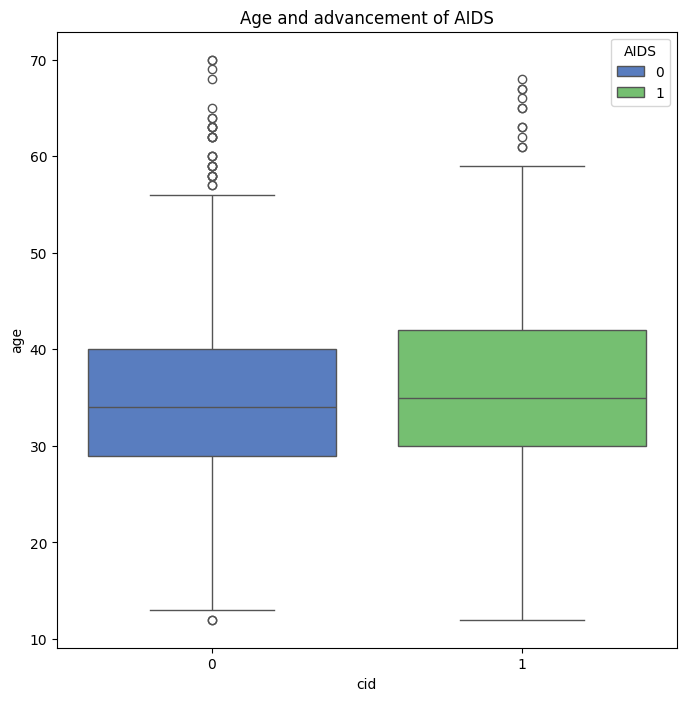

In [25]:
plt.figure(figsize=(8,8))
sns.boxplot(data=y, x='cid', y=X['age'],hue='cid',palette='muted6')
plt.legend(title='AIDS')
plt.title('Age and advancement of AIDS')
plt.show()

In [27]:
median_age_class_0 = X['age'][y['cid'] == 0].median()
median_age_class_1 = X['age'][y['cid'] == 1].median()
mean_age_class_0 = X['age'][y['cid'] == 0].mean()
mean_age_class_1 = X['age'][y['cid'] == 1].mean()

print(f'Mediana age per cid=0: {median_age_class_0}')
print(f'Mediana age per cid=1: {median_age_class_1}')

print(f'Età media per cid=0: {mean_age_class_0}')
print(f'Età media per cid=1: {mean_age_class_1}')

Mediana age per cid=0: 34.0
Mediana age per cid=1: 35.0
Età media age per cid=0: 34.90049443757726
Età media per cid=1: 36.32821497120921


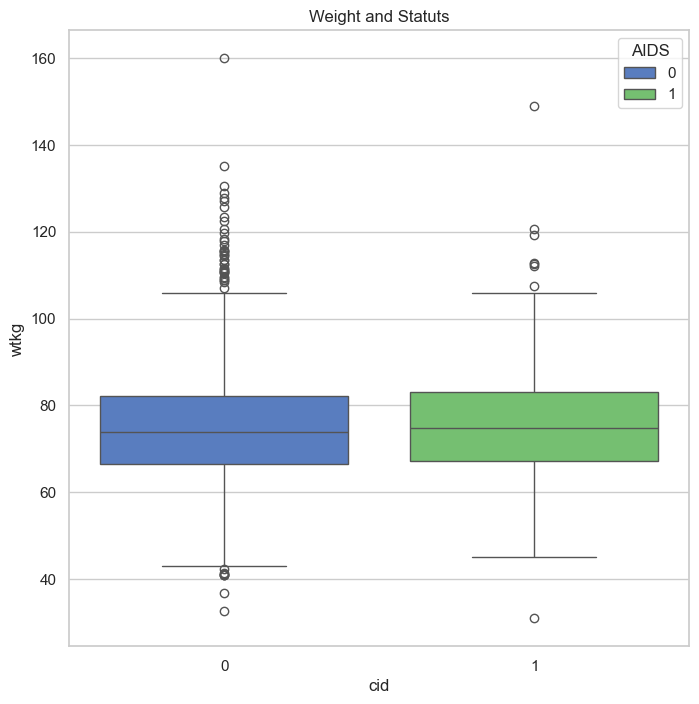

In [98]:
plt.figure(figsize=(8,8))
sns.boxplot(data=y, x='cid', y=X['wtkg'],hue = 'cid',palette ='muted6')
plt.title('Weight and Statuts')
plt.legend(title='AIDS')
plt.show()

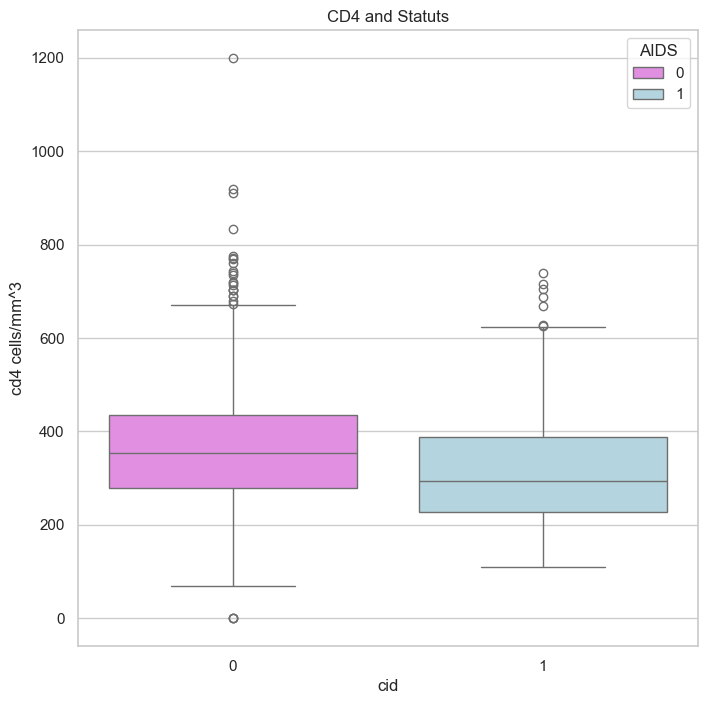

In [112]:
plt.figure(figsize=(8,8))
sns.boxplot(data=y, x='cid', y=X['cd40'],hue = 'cid',palette=['violet','lightblue'])
plt.title('CD4 and Statuts')
plt.ylabel('cd4 cells/mm^3')
plt.legend(title='AIDS')
plt.show()

In [234]:
mean_cd40_class_0 = X['cd40'][y['cid'] == 0].mean()
mean_cd40_class_1 = X['cd40'][y['cid'] == 1].mean()

print(f'Media cd40 per cid=0: {mean_cd40_class_0:.3f}')
print(f'Media cd40 per cid=1: {mean_cd40_class_1:.3f}')

median_cd40_class_0 = X['cd40'][y['cid'] == 0].median()
median_cd40_class_1 = X['cd40'][y['cid'] == 1].median()

print(f'Mediana cd40 per cid=0: {median_cd40_class_0}')
print(f'Mediana cd40 per cid=1: {median_cd40_class_1}')

Media cd40 per cid=0: 362.989
Media cd40 per cid=1: 311.718
Mediana cd40 per cid=0: 353.0
Mediana cd40 per cid=1: 293.0


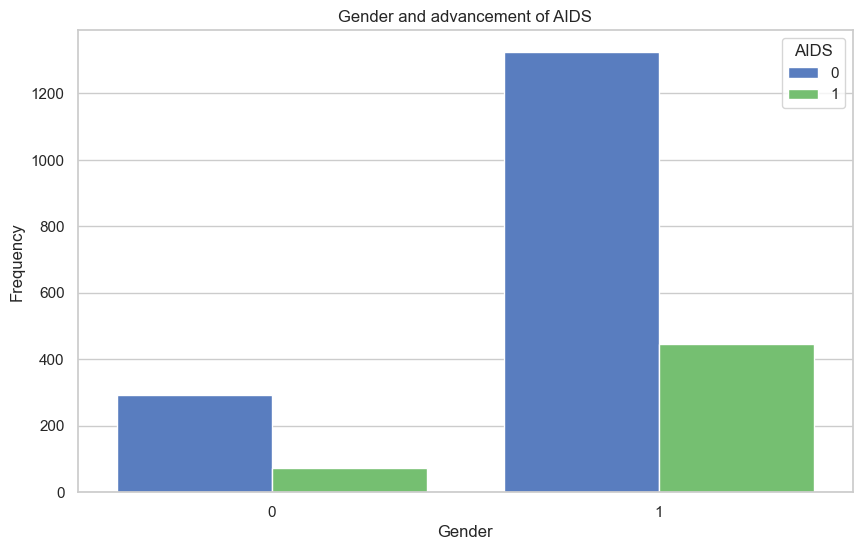

In [202]:
# Gender and aids Barplot
gender = pd.concat([X['gender'], y['cid']], axis=1)
count_df = gender.groupby(['gender', 'cid']).size().reset_index(name='counts')


plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='counts', hue='cid', data=count_df,palette='muted6')
plt.title('Gender and advancement of AIDS')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(title='AIDS' )
plt.show()

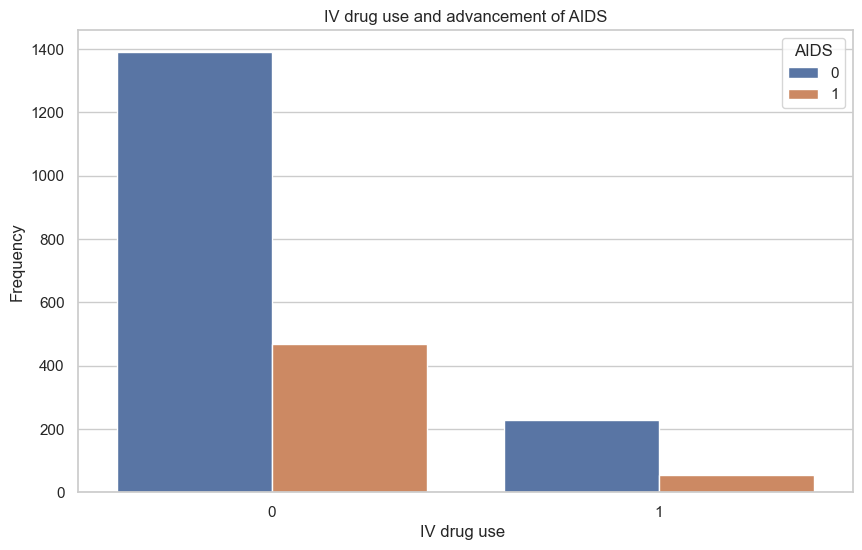

In [100]:
# Use of IV drugs and advancement of aids
drugs_use = pd.concat([X['drugs'], y['cid']], axis=1)
count_df = drugs_use.groupby(['drugs', 'cid']).size().reset_index(name='counts')

#barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='drugs', y='counts', hue='cid', data=count_df)
plt.title('IV drug use and advancement of AIDS')
plt.xlabel('IV drug use ')
plt.ylabel('Frequency')
plt.legend(title='AIDS')
plt.show()

C:\Users\elico\AppData\Local\Temp\ipykernel_14132\402071021.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)


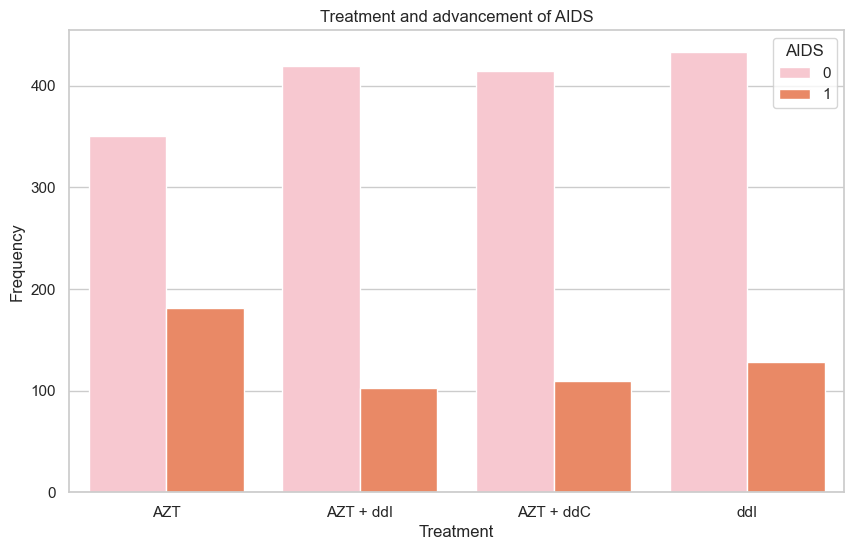

In [188]:
#Treatment and advancement of aids
treatment = pd.concat([X['trt'], y['cid']], axis=1)
count_df = treatment.groupby(['trt', 'cid']).size().reset_index(name='counts')
tick_labels = ['AZT', 'AZT + ddI', 'AZT + ddC', 'ddI']

# barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='trt', y='counts', hue='cid', data=count_df, palette=['pink','coral'])
plt.title('Treatment and advancement of AIDS')
ax.set_xticklabels(tick_labels)
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.legend(title='AIDS')
plt.show()

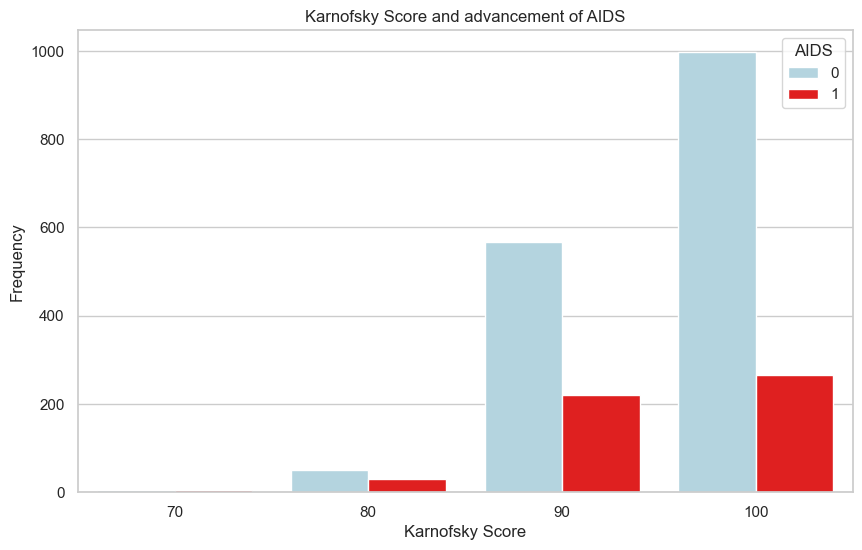

In [121]:
# karnofsky score and cadvancement of aids
karnof = pd.concat([X['karnof'], y['cid']], axis=1)
count_df = karnof.groupby(['karnof', 'cid']).size().reset_index(name='counts')

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='karnof', y='counts', hue='cid', data=count_df,palette=['lightblue','red'])
plt.title('Karnofsky Score and advancement of AIDS')
plt.xlabel('Karnofsky Score')
plt.ylabel('Frequency')
plt.legend(title='AIDS')
plt.show()

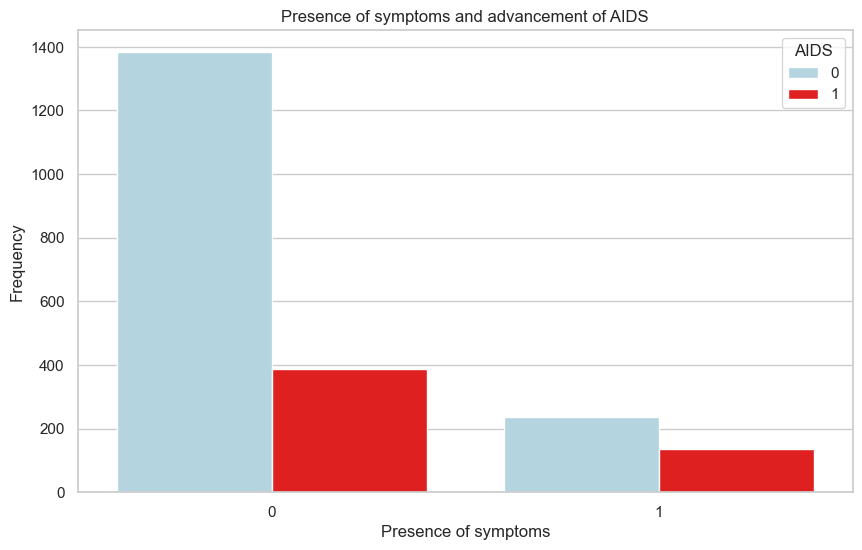

In [203]:
#symptoms and advancement of aids
symptom = pd.concat([X['symptom'], y['cid']], axis=1)
count_df = symptom.groupby(['symptom', 'cid']).size().reset_index(name='counts')

#barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='symptom', y='counts', hue='cid', data=count_df,palette=['lightblue','red'])
plt.title('Presence of symptoms and advancement of AIDS')
plt.xlabel('Presence of symptoms')
plt.ylabel('Frequency')
plt.legend(title='AIDS' )
plt.show()

C:\Users\elico\AppData\Local\Temp\ipykernel_14132\2041470850.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)


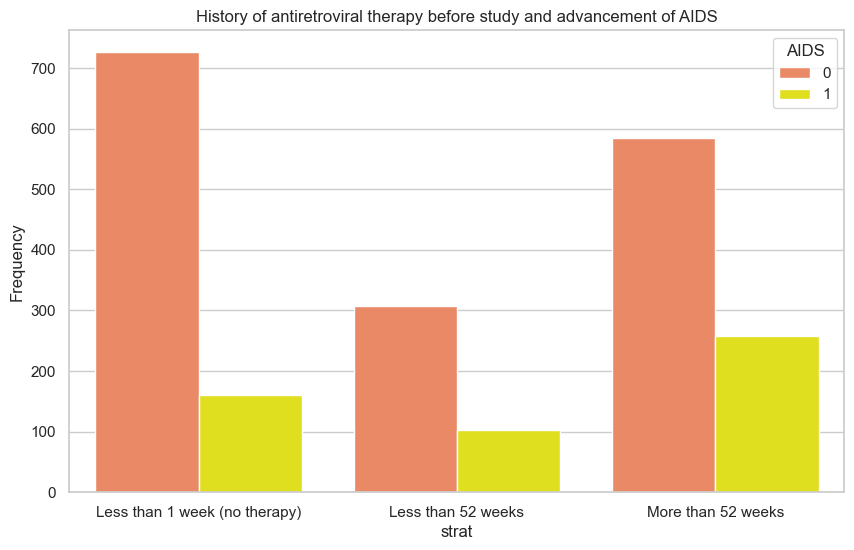

In [246]:
# Analysis between strat and advancement of aids
strat = pd.concat([X['strat'], y['cid']], axis=1)
count_df = strat.groupby(['strat', 'cid']).size().reset_index(name='counts')
tick_labels = ['Less than 1 week (no therapy)', 'Less than 52 weeks', 'More than 52 weeks']

# barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='strat', y='counts', hue='cid', data=count_df,palette=['coral','yellow'])
plt.title('History of antiretroviral therapy before study and advancement of AIDS')
ax.set_xticklabels(tick_labels)
plt.ylabel('Frequency')
plt.legend(title='AIDS')
plt.show()

Multivariate analysis

<Axes: >

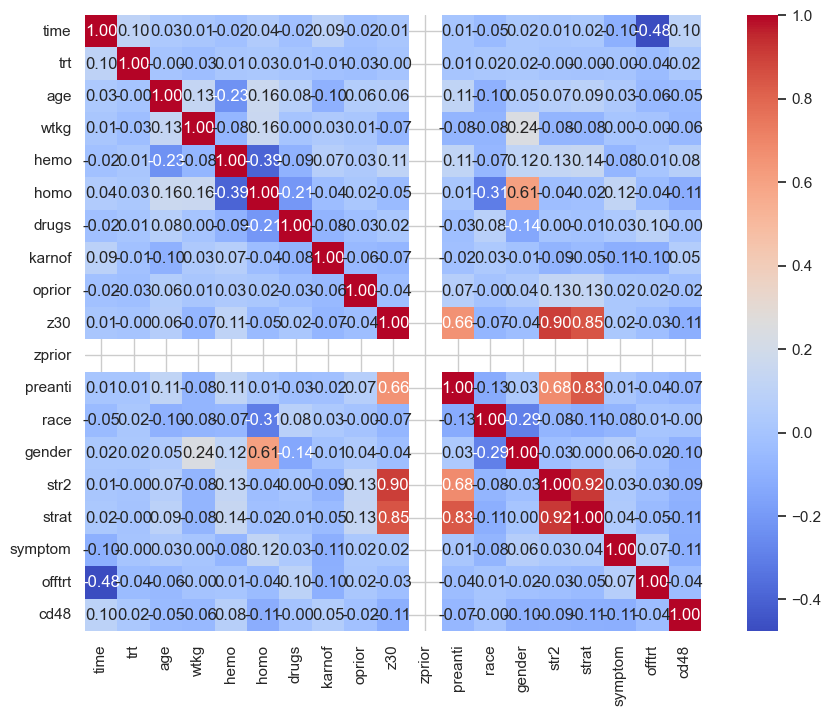

In [282]:
# Correlation Matrix

plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

### Logistic Regression

In [130]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [239]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = X.loc[:,['age','symptom','cd420','gender','strat','karnof']]
data = sm.add_constant(data)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42, stratify=y)

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.476688
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    cid   No. Observations:                 1711
Model:                          Logit   Df Residuals:                     1704
Method:                           MLE   Df Model:                            6
Date:                Tue, 16 Jul 2024   Pseudo R-squ.:                  0.1416
Time:                        17:08:11   Log-Likelihood:                -815.61
converged:                       True   LL-Null:                       -950.16
Covariance Type:            nonrobust   LLR p-value:                 3.375e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4502      1.024      2.394      0.017       0.444       4.456
age            0.0121      0.


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       324
           1       0.72      0.22      0.34       104

    accuracy                           0.79       428
   macro avg       0.76      0.60      0.61       428
weighted avg       0.78      0.79      0.74       428



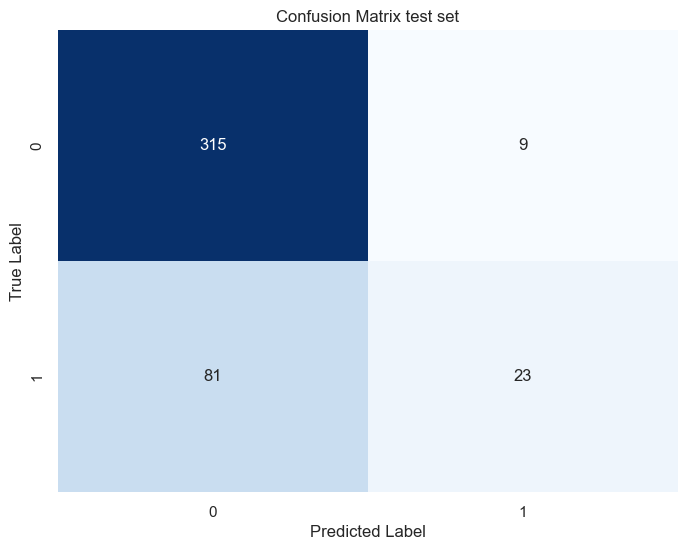

In [240]:
y_pred_prob = result.predict(X_test)

y_pred = (y_pred_prob >= 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix test set')
plt.show()

### Survival Analysis

Cox regression Model

In [5]:
# Cox Model to check the effect of some variables on the hazard function
from lifelines import CoxPHFitter

data_cox = pd.DataFrame({'time': X['time'], 'cid': y['cid'],'age':X['age'],'symptom':X['symptom'],'cd420':X['cd420'],'gender':X['gender'],'strat':X['strat'],'karnof':X['karnof']})

#fit Cox model
cph = CoxPHFitter()
cph.fit(data_cox, duration_col='time', event_col='cid')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 2139 total observations, 1618 right-censored observations>
             duration col = 'time'
                event col = 'cid'
      baseline estimation = breslow
   number of observations = 2139
number of events observed = 521
   partial log-likelihood = -3656.33
         time fit was run = 2024-07-19 07:39:01 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01             0.00             0.02                 1.00                 1.02
symptom     0.38       1.46       0.10             0.18             0.58                 1.19                 1.78
cd420      -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
gender      0.19       1.21       0.13            -0.06             0.44                 0.94                 1.55
strat       0.05       1.05       0.05            -0.05             0.15                 0.95                 1.16
karnof     -0.01       0.99       0.01            -0.03            -0.00                 0.97                 1.00

            cmp to      z      p   -log2(p)
covariate                                  
age           0.00   2.16   0.03       5.02
symptom       0.00   3.70 <0.005      12.17
cd420         0.00 -16.60 <0.005     203.06
gender        0.00   1.51   0.13       2.92
strat         0.00   0.93   0.35       1.49
karnof        0.00  -2.12   0.03       4.89
---
Concordance = 0.75
Partial AIC = 7324.66
log-likelihood ratio test = 418.75 on 6 df
-log2(p) of ll-ratio test = 287.63

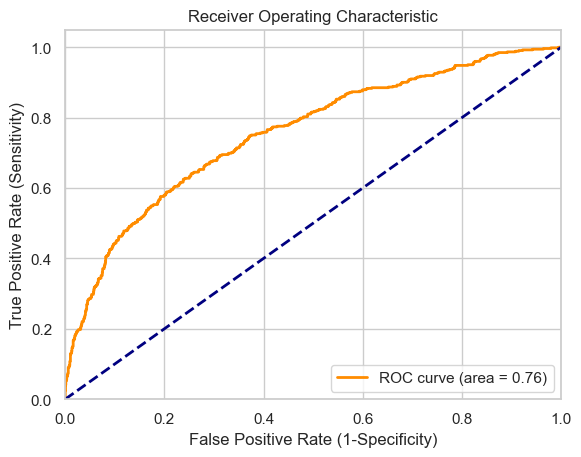

In [208]:
# ROC 
from sklearn.metrics import roc_curve, auc

# Calculate the risks
data_cox['risk_score'] = cph.predict_partial_hazard(data_cox)

fpr, tpr, _ = roc_curve(data_cox['cid'], data_cox['risk_score'])
roc_auc = auc(fpr, tpr)

# Plot 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [170]:
# Data frame with only time and status
data_y = pd.DataFrame({'cid': y['cid'],'time': X['time']})

# Conver the cid colum in True = death and False = Censored
data_y['cid'] = data_y['cid'].astype(bool)
data_y.head()

,cid,time
0,False,948
1,True,1002
2,False,961
3,False,1166
4,False,1090


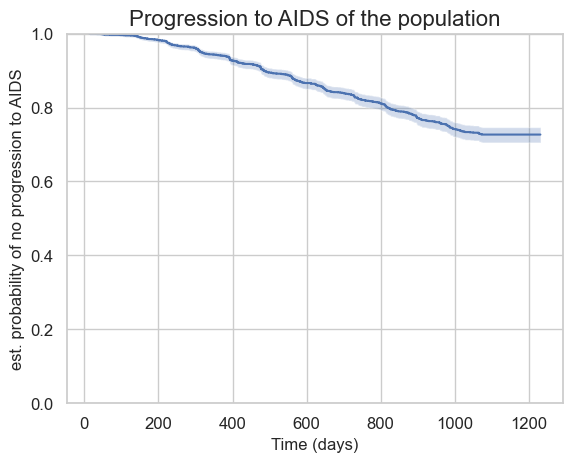

In [183]:
from sksurv.nonparametric import kaplan_meier_estimator
# Survival plot of every person 
time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y['cid'], data_y['time'], conf_type="log-log"
)
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0,1)
plt.ylabel(r"est. probability of no progression to AIDS")
plt.title('Progression to AIDS of the population',fontsize=16)
plt.xlabel("Time (days)")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

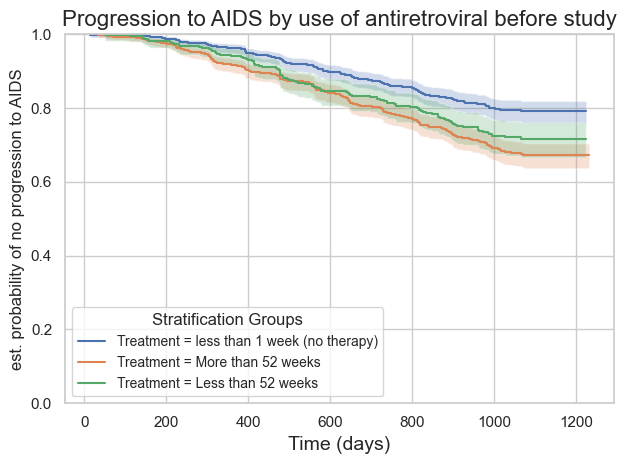

In [247]:
data_y['strat']=X['strat']
treatments = {
    1: 'Less than 1 week (no therapy)',
    2: 'Less than 52 weeks',
    3: 'More than 52 weeks',
}

data_y['strat'] = data_y['strat'].map(treatments)

for strat_type in data_y['strat'].unique():
    mask_treat = data_y["strat"] == strat_type
    time_treatment, survival_prob_treatment, conf_int = kaplan_meier_estimator(
        data_y["cid"][mask_treat],
        data_y["time"][mask_treat],
        conf_type="log-log",
    )

    plt.step(time_treatment, survival_prob_treatment, where="post", label=f"Treatment = {strat_type}")
    plt.fill_between(time_treatment, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.title('Progression to AIDS by use of antiretroviral before study', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel(r'est. probability of no progression to AIDS')
plt.legend(title='Stratification Groups', fontsize=10, title_fontsize=12, loc='best')
plt.grid(True)
plt.ylim(0, 1)
plt.tight_layout()

Usage of antiretroviral terapy before the study might indicate that the infection has been present for more time. This might explain why people who took antiretroviral (such as AZT) medication for more than 52 weeks before the beginning of the trial have more probability of contracting AIDS.
This is sustained by the hazard ratio of the varibiale strat in the cox model (1.05 pvalue <0.005), which means that the increase of the variable strat, expecially with class 3 being 'use of antiretroviral terapy for more than 52 weeks before the study', increases the probability of the advancement of AIDS.

In [ ]:
from lifelines.statistics import multivariate_logrank_test

strat_results = multivariate_logrank_test(data_y['time'], data_y['strat'], data_y['cid'])

print(strat_results)
print('p-value:', strat_results.p_value)

Given the extremely low p-value, we can conclude that there are statistically significant differences between the survival curves of the three groups. This suggests that at least one group has a different effect on survival than the others. Such a low p-value suggests that the probability that the observed differences between survival curves are due to chance is practically zero.

h0: The survival curves of the different groups are the same.

h1: At least one of the groups' survival curves is different from the others.

In [172]:

# effect of the different treatments
data = pd.DataFrame({'time': X['time'], 'cid': y['cid'],'treatment':X['trt']})
data_cox_trt = pd.get_dummies(data,columns=['treatment'],drop_first=True)
#fit Cox model
cph = CoxPHFitter()
cph.fit(data_cox_trt, duration_col='time', event_col='cid')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 2139 total observations, 1618 right-censored observations>
             duration col = 'time'
                event col = 'cid'
      baseline estimation = breslow
   number of observations = 2139
number of events observed = 521
   partial log-likelihood = -3843.41
         time fit was run = 2024-07-15 18:05:42 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
treatment_1  -0.71       0.49       0.12            -0.95            -0.47                 0.39                 0.63
treatment_2  -0.64       0.52       0.12            -0.88            -0.41                 0.41                 0.67
treatment_3  -0.53       0.59       0.12            -0.76            -0.31                 0.47                 0.73

              cmp to     z      p   -log2(p)
covariate                                   
treatment_1     0.00 -5.74 <0.005      26.70
treatment_2     0.00 -5.31 <0.005      23.16
treatment_3     0.00 -4.63 <0.005      18.05
---
Concordance = 0.58
Partial AIC = 7692.82
log-likelihood ratio test = 44.59 on 3 df
-log2(p) of ll-ratio test = 29.72

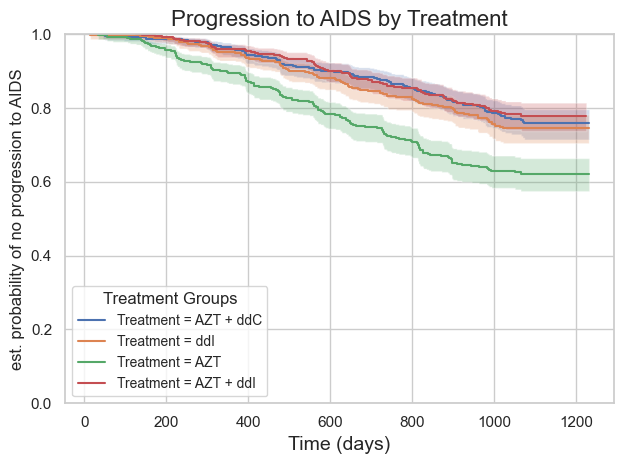

In [195]:
data_y['treatment']=X['trt']
treatments = {
    0: 'AZT',
    1: 'AZT + ddI',
    2: 'AZT + ddC',
    3: 'ddI'
}


data_y['treatment'] = data_y['treatment'].map(treatments)

for treatment_type in data_y['treatment'].unique():
    mask_treat = data_y["treatment"] == treatment_type
    time_treatment, survival_prob_treatment, conf_int = kaplan_meier_estimator(
        data_y["cid"][mask_treat],
        data_y["time"][mask_treat],
        conf_type="log-log",
    )

    plt.step(time_treatment, survival_prob_treatment, where="post", label=f"Treatment = {treatment_type}")
    plt.fill_between(time_treatment, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.title('Progression to AIDS by Treatment', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel(r'est. probability of no progression to AIDS')
plt.legend(title='Treatment Groups', fontsize=10, title_fontsize=12, loc='best')
plt.grid(True)
plt.ylim(0, 1)
plt.tight_layout()


Log rank test for the curves ZDV + ddI and ZDV + ddC

In [194]:
from lifelines.statistics import logrank_test

group1 = data_y[data_y['treatment'] == 'AZT + ddI']
group0 = data_y[data_y['treatment'] == 'AZT']


results = logrank_test(group1['time'], group0['time'], event_observed_A=group1['cid'], event_observed_B=group0['cid'])

print(results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.22 0.64      0.65


The best treatment is AZT + ddI: Initial clinical studies on the combined use of AZT and ddI showed a significant reduction in viral load and improvement in CD4 cell counts in treated patients.

The use of antiretroviral drug combinations is a key strategy to prevent the development of resistance. HIV can mutate and become resistant when treated with just one drug, but using multiple drugs together makes it more difficult for the virus to develop resistance.